In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [3]:
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [6]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [7]:
df=pd.read_csv('/content/loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [9]:
df.shape

(4269, 13)

In [10]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [11]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [12]:
df.duplicated().sum()

0

In [13]:
df1 = df.copy()

In [14]:
df1 = df1.drop('loan_id',axis=1)

In [15]:
df1.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

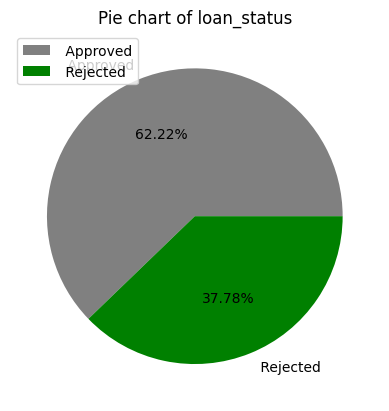

In [16]:
plt.pie(df1[' loan_status'].value_counts(),labels=df1[' loan_status'].value_counts().index,colors=['grey','g'],autopct='%1.2f%%')
plt.legend(df1[' loan_status'].unique())
plt.title('Pie chart of loan_status')
plt.show()

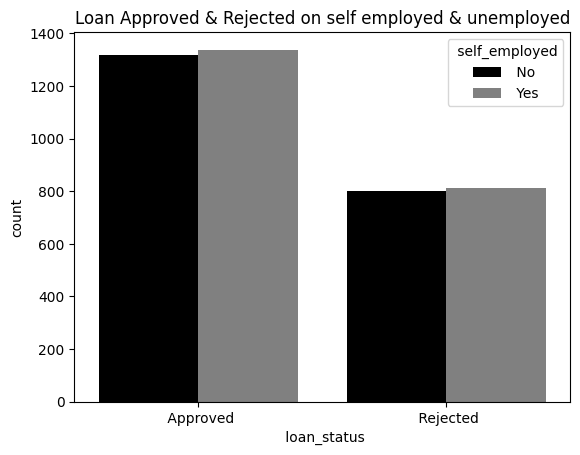

In [17]:
sns.countplot(x=df1[' loan_status'],hue=df1[' self_employed'],palette=['k','grey'])
plt.title('Loan Approved & Rejected on self employed & unemployed')
plt.show()

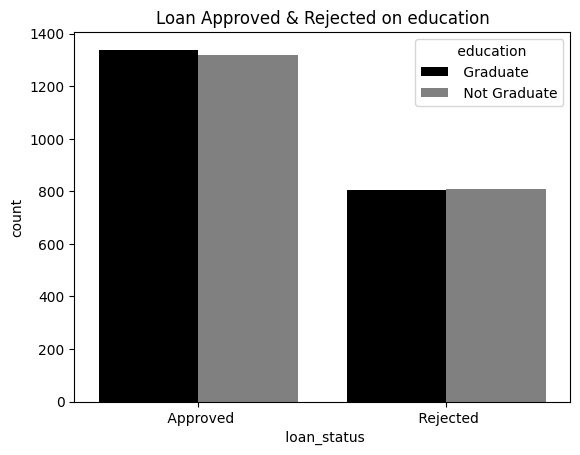

In [18]:
sns.countplot(x=df1[' loan_status'],hue=df1[' education'],palette=['k','grey'])
plt.title('Loan Approved & Rejected on education')
plt.show()

In [19]:
df1[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [20]:
df1[' education'].replace([' Graduate', ' Not Graduate'],[1,0],inplace=True)

<ipython-input-20-cdd9a81789d7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[' education'].replace([' Graduate', ' Not Graduate'],[1,0],inplace=True)
<ipython-input-20-cdd9a81789d7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[' education'].replace([' Graduate', ' Not Graduate'],[1,0

In [21]:
df1[' self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [22]:
df1[' self_employed'].replace([' No', ' Yes'],[0,1],inplace=True)

<ipython-input-22-8f712ff6401d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[' self_employed'].replace([' No', ' Yes'],[0,1],inplace=True)
<ipython-input-22-8f712ff6401d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[' self_employed'].replace([' No', ' Yes'],[0,1],inplace=True)


In [23]:
df1[' loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [24]:
df1[' loan_status'].replace([' Approved', ' Rejected'],[1,0],inplace=True)

<ipython-input-24-b2a11b00a81a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[' loan_status'].replace([' Approved', ' Rejected'],[1,0],inplace=True)
<ipython-input-24-b2a11b00a81a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[' loan_status'].replace([' Approved', ' Rejected'],[1,0],in

In [25]:
df1.dtypes

,0
no_of_dependents,int64
education,int64
self_employed,int64
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64
luxury_assets_value,int64


In [26]:
c=df1.corr()
c

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
no_of_dependents,1.000000,0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,-0.018114
education,0.002697,1.000000,-0.023224,0.011625,0.010631,-0.008417,-0.004649,0.010930,-0.006763,0.012471,0.009424,0.004918
self_employed,0.000765,-0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,0.000345
income_annum,0.007266,0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,-0.015189
loan_amount,-0.003366,0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,0.016150
loan_term,-0.020111,-0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,-0.113036
cibil_score,-0.009998,-0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,0.770518
residential_assets_value,0.007376,0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,-0.014367
commercial_assets_value,-0.001531,-0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,0.008246
luxury_assets_value,0.002817,0.012471,0.004413,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,-0.015465


In [27]:
s=df1.corr()[' loan_status']
s.sort_values(ascending=False)

,loan_status
loan_status,1.000000
cibil_score,0.770518
loan_amount,0.016150
commercial_assets_value,0.008246
education,0.004918
self_employed,0.000345
bank_asset_value,-0.006778
residential_assets_value,-0.014367
income_annum,-0.015189
luxury_assets_value,-0.015465


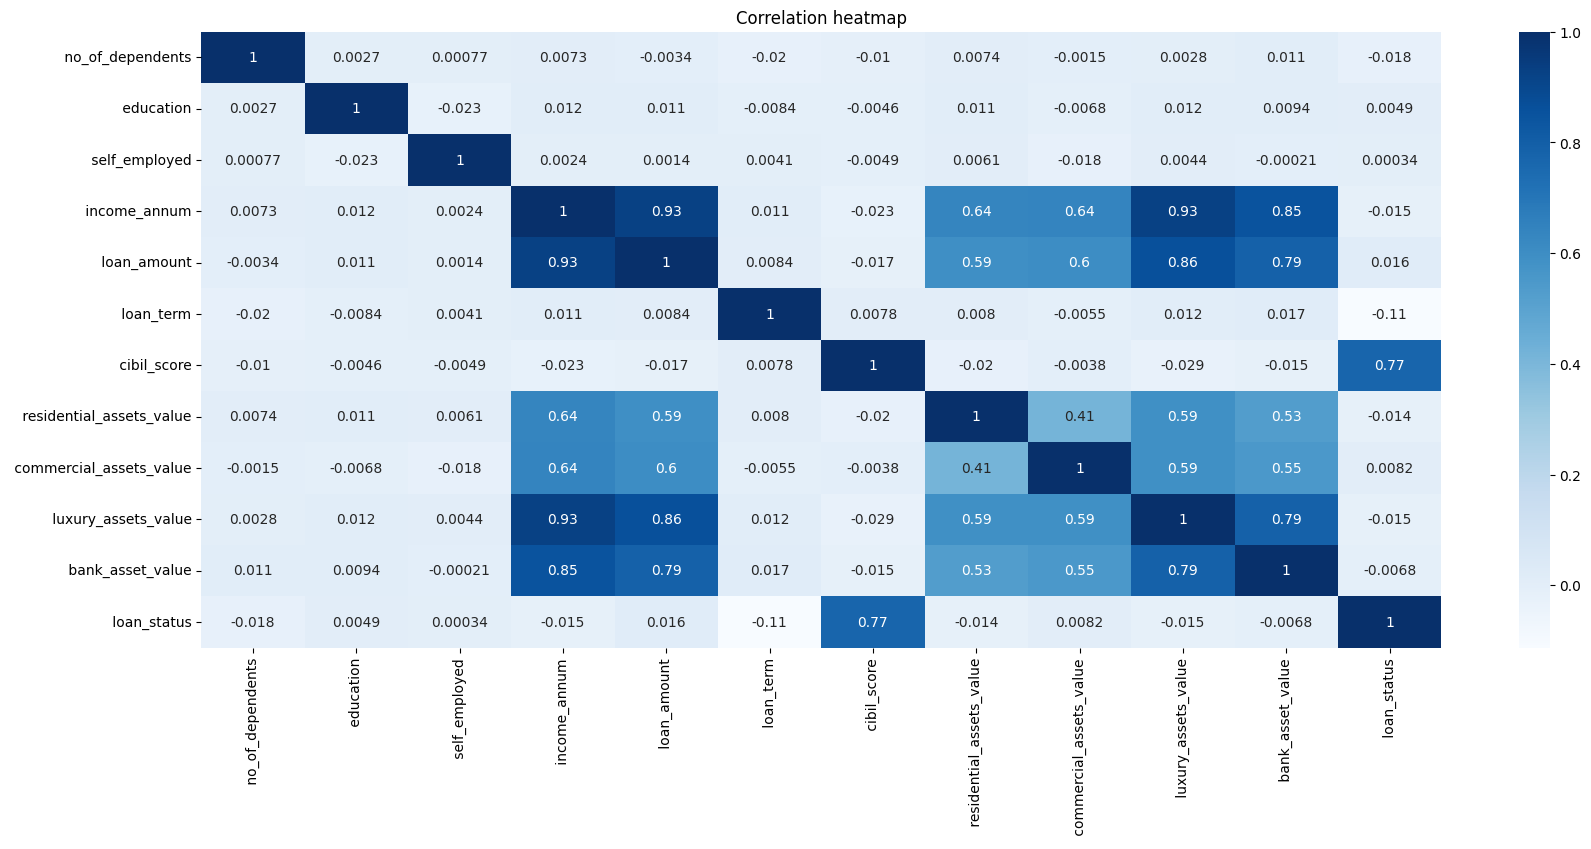

In [28]:
plt.figure(figsize=(20,8))
sns.heatmap(c,annot=True,cmap='Blues')
plt.title('Correlation heatmap')
plt.show()

In [29]:
x=df1[[' no_of_dependents',' education',' self_employed',' income_annum',' loan_amount',' loan_term',' cibil_score',' residential_assets_value',' commercial_assets_value',' luxury_assets_value',' bank_asset_value']]
y=df1[' loan_status']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [43]:
models = {

    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier()
}
skf = StratifiedKFold(n_splits=5)

In [39]:
from sklearn.model_selection import cross_val_score
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)

    cv_score = cross_val_score(model, x_train, y_train, cv=skf, scoring='accuracy').mean()

    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        'CV Accuracy': cv_score,
        'Test Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        # 'MCC': matthews_corrcoef(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A',
        'Confusion Matrix': confusion_matrix(y_test, y_pred).ravel()  # (tn, fp, fn, tp)
    }
    return metrics

In [44]:
from tabulate import tabulate
import warnings

warnings.filterwarnings('ignore')

results = {}

for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    metrics = evaluate_model(model, x_train, y_train, x_test, y_test)
    results[model_name] = metrics

results_df = pd.DataFrame(results).T

results_df = results_df.sort_values(by='F1 Score', ascending=False)
results_df

Training and evaluating Random Forest...
Training and evaluating AdaBoost...
Training and evaluating Extra Trees...


,CV Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC-AUC,Confusion Matrix
Random Forest,0.978331,0.982436,0.983051,0.988636,0.985836,0.997984,"[317, 9, 6, 522]"
Extra Trees,0.96164,0.962529,0.976923,0.962121,0.969466,0.992689,"[314, 12, 20, 508]"
AdaBoost,0.962811,0.961358,0.962617,0.975379,0.968956,0.994504,"[306, 20, 13, 515]"


In [45]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [46]:
x_test

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
790,5,0,1,4600000,14500000,14,561,2300000,6200000,10200000,5800000
188,5,0,1,7300000,23300000,6,622,7100000,11600000,26400000,10500000
2761,4,0,0,7900000,25700000,18,589,4300000,300000,25300000,9800000
2857,4,1,1,5600000,13000000,4,899,10500000,9100000,11400000,6400000
2403,1,0,0,9300000,27500000,6,364,12200000,13800000,25300000,10800000
...,...,...,...,...,...,...,...,...,...,...,...
618,3,0,1,2000000,6900000,6,834,2200000,2800000,6400000,3000000
2610,1,1,1,5800000,13000000,12,862,11300000,8400000,12000000,3900000
3176,4,0,1,3100000,8200000,18,408,2900000,3800000,10800000,3100000
2917,2,1,0,1700000,5700000,10,602,4900000,2700000,4500000,1800000


In [47]:
y_test

,loan_status
790,1
188,1
2761,1
2857,1
2403,0
...,...
618,1
2610,1
3176,0
2917,1


In [48]:
input_data=(4,	1,	1,	7200000,	23100000,	14,	644,	13300000,	3500000,	18300000,	4200000)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

# std_data= scaler.transform(input_data_reshaped)

prediction=model.predict(input_data_reshaped)

print(prediction)

[1]


In [49]:
input_data=(1,	0,	0,	9300000,	27500000,	6,	364,	12200000,	13800000,	25300000,	10800000)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

# std_data= scaler.transform(input_data_reshaped)

prediction=model.predict(input_data_reshaped)

print(prediction)

[0]
